In [2]:
def initiate_sharknado():
    import pandas as pd
    import numpy as np
    import re
    from datetime import time

    SAdf=pd.read_csv('SAdf.csv')
    return SAdf

SAdf = initiate_sharknado()

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import re

**1. Reformat the information about the gender information in the database, as there are son extra spaces and wrong inputs.**

In [4]:
SAdf.Sex.unique()

array(['M', 'F', nan, ' M', 'm', 'M '], dtype=object)

In [5]:
SAdf.columns

Index(['Year', 'Date', 'Time', 'Type', 'Sex', 'Age', 'Activity', 'Location',
       'Country', 'State', 'Fatal Y/N'],
      dtype='object')

In [29]:
SAdf['Sex']=SAdf.Sex.fillna('UNKNOWN')

In [30]:
SAdf.Sex.isna().sum()

np.int64(0)

In [31]:
SAdf['Sex'] = (SAdf['Sex'].astype(str).str.strip().str.upper())

In [32]:
SAdf.Sex.unique()

array(['M', 'F', 'UNKNOWN'], dtype=object)

In [33]:
SAdf.Sex.value_counts()

Sex
M          599
F          203
UNKNOWN     18
Name: count, dtype: int64

**2. Clean the null values in the Age column, format the data {Invalid symbols, Pure numbers, Age ranges like 30s, 40s, etc., Teen, Middle age, Minor, Extract all digits(handles cases like ‘!2’, ‘!6’, ‘45 and 15’, etc.)}, and then convert the Age type to integer.**

In [34]:
SAdf.Age.nunique()

85

In [35]:
SAdf.Age.unique()

array(['54', '8', '?', '69', '18', '21', '40', '20', '12', '9', '42',
       '26', '23', '27', '16', '14', 'Middle age', '49', '25', '15', '45',
       '46', '19', '65', nan, '11', '39', '66', '30', '50', '52', '38',
       '30s', '37', '22', '60', '47', '!2', '35', '24', '13', '50s', '58',
       '67', '34', '68', '43', '10', '29', '51', '31', '33', '41', '17',
       '28', '62', 'teen', '56', 'Teen', '!6', '64', '!!', '36', '7',
       '71', '57', '45 and 15', '73', '61', '48', '70', '55', '63', '32',
       '22, 57, 31', '60s', '74', 'a minor', '20s', '3', '59', '6', '44',
       '53', '5', '86'], dtype=object)

In [36]:
SAdf.Age.isna().sum()

np.int64(178)

In [37]:
def clean_age(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip().lower()
    if x in ['?','!!']:
        return np.nan
    if x.isdigit():
        return int(x)
    if re.match(r'^\d{2}s$', x):
        return int(x[:2])
    if 'teen' in x:
        return 15
    if 'middle' in x:
        return 45
    if 'minor' in x:
        return 10
        
    nums = re.findall(r'\d+', x)
    if len(nums) >= 1:
        return int(nums[0])

    return np.nan

In [38]:
SAdf['Age'] = SAdf['Age'].apply(clean_age).astype('Int64')

In [39]:
SAdf['Age'].value_counts().sort_values(ascending=False)

Age
15    26
12    24
16    24
14    22
19    20
      ..
62     1
74     1
73     1
2      1
86     1
Name: count, Length: 72, dtype: Int64

In [40]:
SAdf['Age'].dtype

Int64Dtype()

**3.Map the original activities (Swimming, Body surfing, Surfing, Fishing, Playing… etc.) into a standardized set of activity categories：**

- **Surfing, kite-surfing, surf fishing - > Surfing**
- **Swimming, swimming/treading water - > Swimming**
- **Fishing, spear-fishing, kayak fishing - > Fishing**
- **Diving, scuba diving, free diving - > Diving**
- **Standing, walking, wadin - > Wading/Standing**
- **Undisclosed, Not stated, NaN  - > Unknown**


In [41]:
SAdf['Activity'].nunique() 

112

In [42]:
SAdf['Activity'].unique() 

array(['Swimming', 'Snorkeling', 'Fishing', 'Diving', 'Surfing',
       'Undisclosed', 'Diving into Water', 'Wading',
       'Playing football in the water',
       'Unconfirmed Possibly swimming near the boat harbour',
       'Swimming ocean training ', 'Spearfishing', 'Kayak fishing',
       'Boogie boarding', 'Sitting', 'Standing', 'Filming',
       'Shark Feeding', 'Windsurfing', 'Kite-Surfing', 'Spearishing',
       'Shipwreck', 'Swimming  or Snorkeling', 'Paddleboarding',
       'Lobstering', nan, 'Lifeguard Training Exercise',
       'Lifeguard Exercises', 'Scalloping', 'Jumped into water',
       'Feeding sharks & stingrays', 'Kayaking', 'Wing Foil Surfing',
       'Boogie Boarding', 'Fishing, fell in water', 'Playing', 'Canoeing',
       'Kite Foiling', 'Boggie boarding', 'Tagging sharks',
       'Body surfing', 'Body Surfing', 'Surf fishing', 'Treading water',
       'Skimboarding', 'Body Boarding', 'Stand-Up Paddleboarding',
       'Stand-Up Paddle boarding', 'Swimming/ Trea

In [43]:
SAdf['Activity_clean'] = SAdf['Activity'].str.lower().str.strip()

In [44]:
activity_map = {
    'surf': 'Surfing',
    'kite': 'Surfing',
    'body surf': 'Surfing',

    'swim': 'Swimming',
    'treading water': 'Swimming',

    'diving': 'Diving',
    'scuba': 'Diving',
    'snorkel': 'Diving',

    'fish': 'Fishing',
    'spear': 'Fishing',
    'lobster': 'Fishing',

    'paddle': 'Paddleboarding',
    'canoe': 'Paddleboarding',
    'kayak': 'Paddleboarding',

    'wading': 'Wading/Standing',
    'standing': 'Wading/Standing',
    'walking': 'Wading/Standing',

    'touching a shark': 'Animal Interaction',
    'feeding': 'Animal Interaction',

    'photo': 'Photography',
    'filming': 'Photography',

    'unknown': 'Unknown',
    'not stated': 'Unknown',
    'undisclosed': 'Unknown'
}

In [45]:
def map_activity(x):
    if pd.isna(x):
        return 'Unknown'
    x = str(x).lower()

    for key, value in activity_map.items():
        if key in x:
            return value
    return 'Other'

In [46]:
SAdf['Activity'] = SAdf['Activity'].apply(map_activity)

In [47]:
SAdf['Activity'].value_counts()

Activity_grouped
Surfing               295
Swimming              149
Fishing                96
Other                  75
Wading/Standing        73
Unknown                48
Diving                 42
Paddleboarding         35
Animal Interaction      4
Photography             3
Name: count, dtype: int64

In [48]:
import re

def clean_text(s):
    if isinstance(s, str):
        s = re.sub(r'[^\x00-\x7F]+', '', s)   
    return s

SAdf = SAdf.apply(lambda col: col.map(clean_text))

In [50]:
SAdf.to_csv('clean_shark_data.csv', index=False)

In [11]:
SAdf['Year'].value_counts()

Year
2015    73
2017    67
2016    65
2014    65
2012    64
2013    60
2019    59
2021    55
2022    52
2020    49
2011    48
2023    46
2018    43
2010    40
2025    17
2024    16
2026     1
Name: count, dtype: int64

In [10]:
SAdf.columns

Index(['Year', 'Date', 'Time', 'Type', 'Sex', 'Age', 'Activity', 'Location',
       'Country', 'State', 'Fatal Y/N'],
      dtype='object')

In [14]:
SAdf = SAdf[(SAdf['Year'] >= 2010) & (SAdf['Year'] <= 2024)]

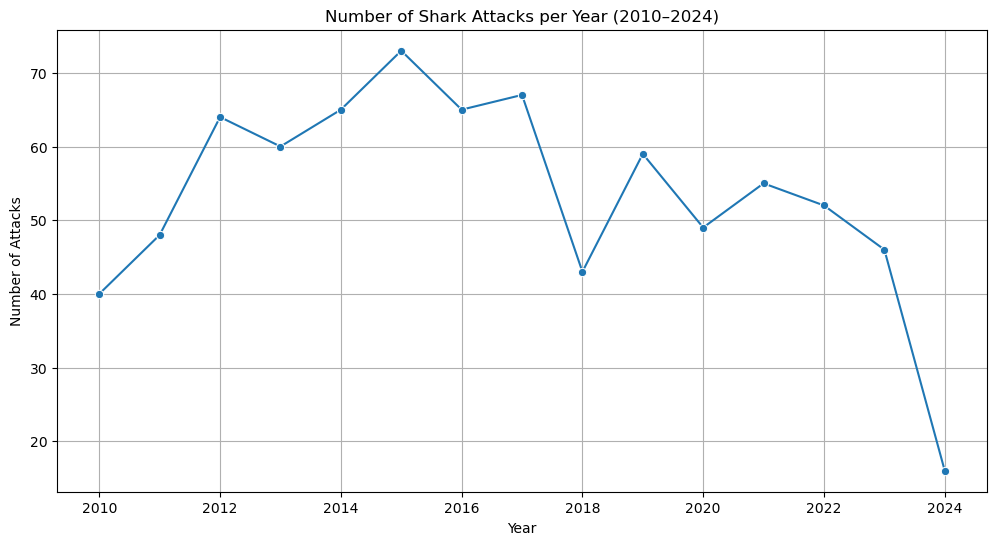

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

year_counts = SAdf['Year'].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')

plt.title("Number of Shark Attacks per Year (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)

plt.savefig("shark_attacks_by_year_2010_2024.png", dpi=300, bbox_inches='tight')
plt.show()